In [1]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
train = pd.read_csv('titanic_train.csv')

In [79]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


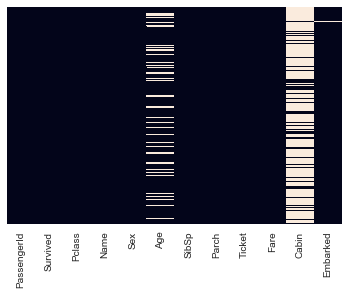

In [81]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False)

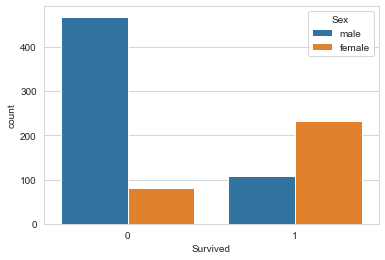

In [82]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train,hue='Sex')

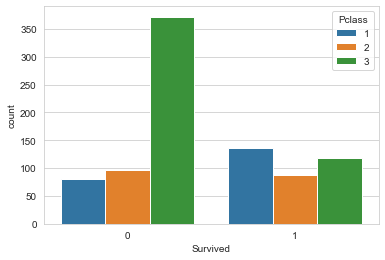

In [83]:
sns.countplot(x='Survived', data=train,hue='Pclass')

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



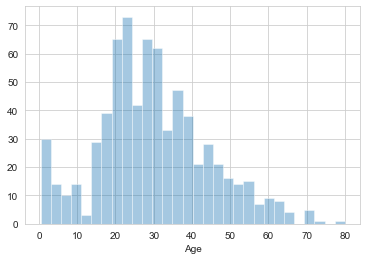

In [84]:
sns.distplot(train['Age'],bins=30,kde=False)

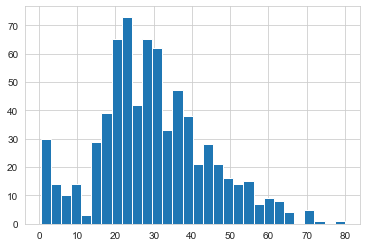

In [85]:
train['Age'].hist(bins=30)

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


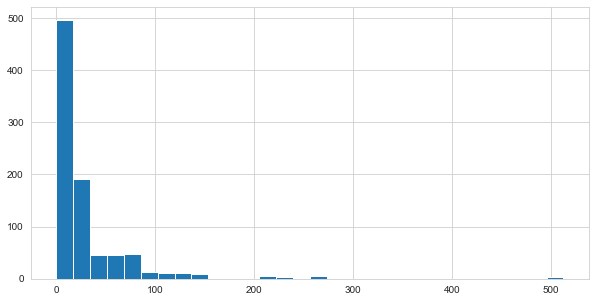

In [87]:
train['Fare'].hist(bins=30,figsize=(10,5))

In [88]:
!pip install cufflinks

In [89]:
import cufflinks as cf

In [90]:
cf.go_offline()

In [91]:
train['Fare'].iplot(kind='hist',bins=40)

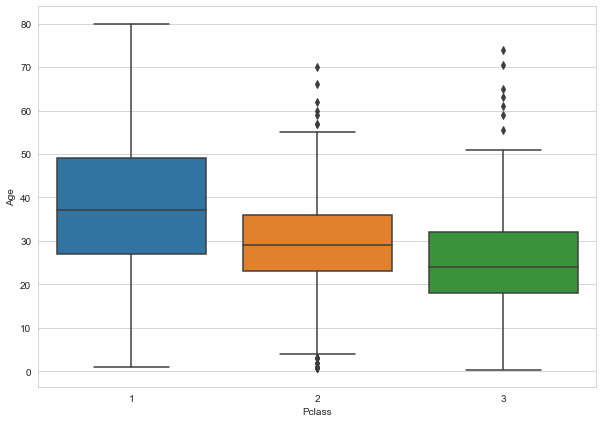

In [92]:
plt.figure(figsize=(10,7))
sns.boxplot(y='Age',x='Pclass',data=train)

In [93]:
def impute_age(col):
    Pclass=col[0];
    Age=col[1];
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [94]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

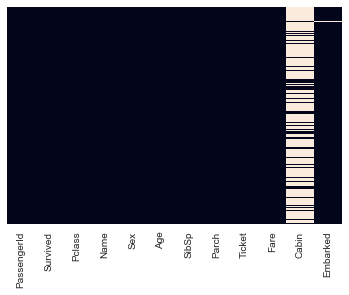

In [95]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False)

In [96]:
train.drop('Cabin',axis=1,inplace=True)

In [97]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,3.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,S


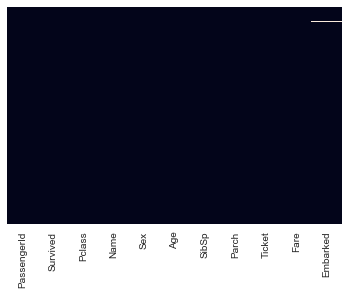

In [98]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False)

In [99]:
train.dropna(inplace=True)

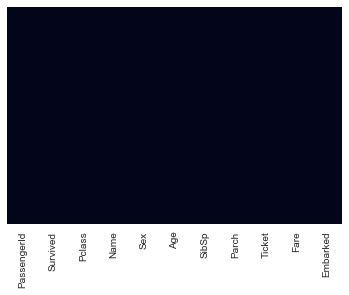

In [100]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False)

In [101]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [102]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [103]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [104]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [105]:
train = pd.concat([train,sex,embark],axis=1)

In [106]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,3.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,S,1,0,1


In [108]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [114]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,3.0,1,0,7.2500,1,0,1
1,1,1,1.0,1,0,71.2833,0,0,0
2,1,3,3.0,0,0,7.9250,0,0,1
3,1,1,1.0,1,0,53.1000,0,0,1
4,0,3,3.0,0,0,8.0500,1,0,1


In [121]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,3.0,1,0,7.2500,1,0,1
1,1,1.0,1,0,71.2833,0,0,0
2,3,3.0,0,0,7.9250,0,0,1
3,1,1.0,1,0,53.1000,0,0,1
4,3,3.0,0,0,8.0500,1,0,1


In [130]:
X = train

In [119]:
y = train['Survived']
X = train.drop('Survived',axis=1,inplace=True)

KeyError: 'Survived'

In [127]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [134]:
X_test.size

2352

In [135]:
from sklearn.linear_model import LogisticRegression

In [137]:
logmodel = LogisticRegression()

In [138]:
logmodel.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
predictions = logmodel.predict(X_test)

In [140]:
from sklearn.metrics import classification_report

In [141]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       184
           1       0.75      0.73      0.74       110

    accuracy                           0.81       294
   macro avg       0.80      0.79      0.80       294
weighted avg       0.81      0.81      0.81       294



In [142]:
from sklearn.metrics import confusion_matrix

In [143]:
confusion_matrix(y_test,predictions)

array([[158,  26],
       [ 30,  80]], dtype=int64)